# classification problem

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score


C:\Users\275527\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
dta = sm.datasets.fair.load_pandas().data
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

Data Exploration

In [6]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


an increase in age, yrs_married, and children appears to correlate with a declining marriage rating.

Text(0,0.5,'Frequency')

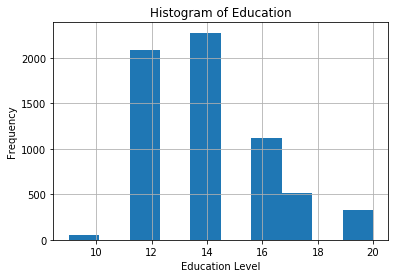

In [8]:
#Histogram of Education
%matplotlib inline
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

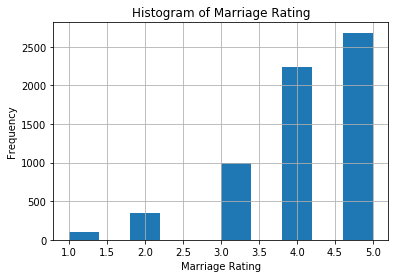

In [9]:
#Histogram of Marriage Rating
%matplotlib inline
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Distribution of marriage ratings for those having affairs versus those not having affairs

Text(0,0.5,'Frequesny')

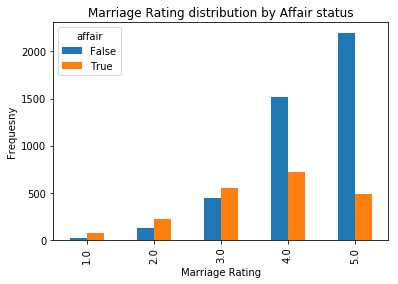

In [10]:
#marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating distribution by Affair status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequesny')

stacked barplot to look at the percentage of women having affairs by number of years of marriage

Text(0,0.5,'Percentage')

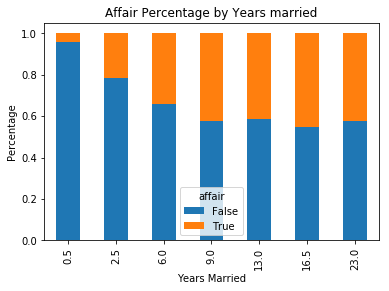

In [11]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

Prepare Data for Logistic Regression - 
adding an intercept column as well as dummy variables for occupation and occupation_husb

In [14]:
# an intercept column as well as dummy variables for occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
print(X.columns)


Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [15]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

Logistic Regression

In [16]:
model = LogisticRegression()
model = model.fit(X,y)

#accuracy of training set
model.score(X,y)

0.7258875274897895

Error Rate - Only 32% of the women had affairs

In [17]:
y.mean()

0.3224945020420987

In [19]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.489835891324933]
1,occ_2,[0.18806639024440983]
2,occ_3,[0.4989478668156914]
3,occ_4,[0.25066856498524825]
4,occ_5,[0.8390080648117001]
5,occ_6,[0.8339084337443315]
6,occ_husb_2,[0.1906359445867889]
7,occ_husb_3,[0.2978327129263421]
8,occ_husb_4,[0.1614088540760616]
9,occ_husb_5,[0.18777091388972483]


Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. 

For both the wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to the baseline occupation (student), since all of the dummy coefficients are positive.

# Model Evaluation Using a Validation Set-

In [21]:
#evaluate the model by splitting into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
#predict class labelsfor the test set
predicted = model2.predict(X_test)
print(predicted)

[1. 0. 0. ... 1. 0. 0.]


In [23]:
#generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[[0.35971898 0.64028102]
 [0.9113173  0.0886827 ]
 [0.72671132 0.27328868]
 ...
 [0.35251605 0.64748395]
 [0.6107136  0.3892864 ]
 [0.62412678 0.37587322]]


the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

In [24]:
#generate evaluation metrics
print(metrics.accuracy_score(Y_test, predicted))
print(metrics.roc_auc_score(Y_test, probs[:, 1]))

0.7306044740599714
0.7530306212155837


The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.

In [26]:
# confusion matrix and a classification report with other metrics
print(metrics.confusion_metrix(Y_test, predicted))
print(metrics.classification_report(Y_test, predicted))

AttributeError: module 'sklearn.metrics' has no attribute 'confusion_metrix'

Model Evaluation Using Cross-Validation- 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [28]:
#evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
0.7241630685514876


 It's still performing at 73% accuracy.So our model is ready for prediction!

Assuming she's a 25-year-old house wife who graduated college, has been married for 3 years, has 1 child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer.

In [30]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4, 16]]))

array([[0.77472221, 0.22527779]])

From our model we can predict that probability of an affair is 23%.